# Retail Sales Data Analysis with Python


This project explores a retail sales dataset using Python to uncover key customer and product insights.  
Through exploratory data analysis (EDA), we investigate patterns in sales across product categories, time trends, customer demographics, and purchase behavior.

The goal of this analysis is to extract actionable insights for data-driven decision-making, such as which products generate the most revenue, how sales vary over time, and how customer attributes (like gender and age) relate to purchasing.

The analysis includes:
- Data cleaning and preparation
- Visualizations (bar charts, line plots, heatmaps)
- Correlation analysis
- Time-based sales trends
- Category-level breakdowns by gender

 Key takeaways documented throughout the notebook


In [171]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [141]:
os.makedirs('visuals', exist_ok=True)


In [2]:
#loading the dataset
df=pd.read_csv('retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [3]:
#peek into the data
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
#checking for missing values and duplicates
df.isna().sum()
df.duplicated().sum()

0

### Observation
No null or duplicated values in the dataset

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
#Converting Data Types and Parsing Dates
df['Year']= df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Month_Name']=df['Date'].dt.month_name()
df['Weekday']=df['Date'].dt.day_name()
df['Day']=df['Date'].dt.day
df['Week']=df['Date'].dt.isocalendar().week

C:\Users\Dell\AppData\Local\Temp\ipykernel_12740\532817856.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Month_Name')['Total Amount'].sum().plot(kind='bar', title='Monthly Sales')


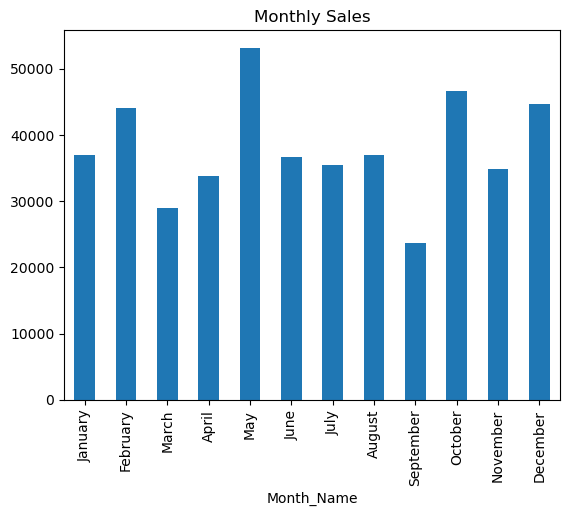

In [164]:
# analysing total monthly sales
from pandas.api.types import CategoricalDtype
month_order= ['January','February','March','April','May','June','July','August','September','October','November','December']

month_type=CategoricalDtype(categories=month_order, ordered=True)

df['Month_Name']=df['Month_Name'].astype(month_type)

df.groupby('Month_Name')['Total Amount'].sum().plot(kind='bar', title='Monthly Sales')
plt.savefig('visuals/total_monthly_sales.png')


C:\Users\Dell\AppData\Local\Temp\ipykernel_12740\3852529586.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Weekday')['Total Amount'].sum().plot(kind='bar',title='Sales by Day of the Week')


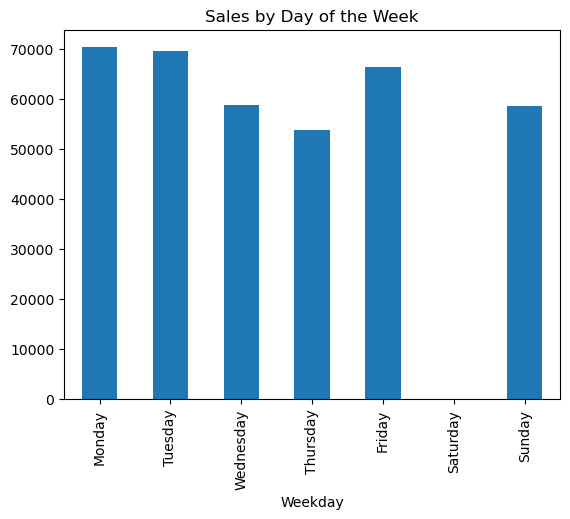

In [162]:
# analysing daily total sales
from pandas.api.types import CategoricalDtype

# defining the correct weekday order
Weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

Weekday_dtype=CategoricalDtype(categories=Weekday_order,ordered=True)

df['Weekday']=df['Weekday'].astype(Weekday_dtype)

df.groupby('Weekday')['Total Amount'].sum().plot(kind='bar',title='Sales by Day of the Week')
plt.savefig('visuals/daily_total_sales.png')

In [62]:
df['Weekday'].value_counts()


Weekday
Tuesday      161
Monday       146
Friday       143
Wednesday    139
Sunday       138
Thursday     123
Saturday       0
Name: count, dtype: int64

### Observation

I extracted the month and weekday from each transaction's date to analyze temporal trends.
- Most sales occurred in May suggesting strong seasonal demand.
- Weekdays( Monday, Tuesday and Friday) saw higher average spending compared to other  weekdays.


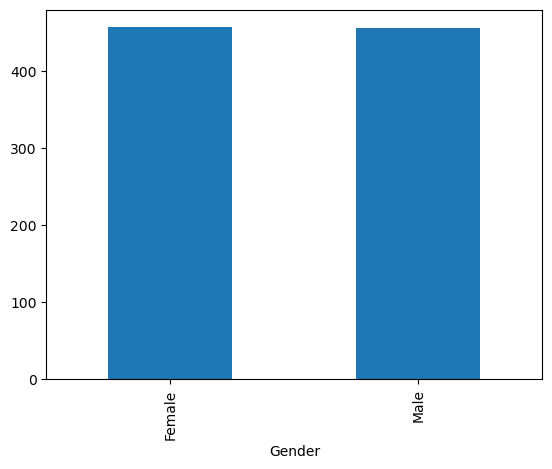

In [160]:
# displaying total spend of both gender
df.groupby('Gender')['Total Amount'].mean().plot(kind='bar')
plt.savefig('visuals/gender_total_spend.png')

### Observation

The average transaction amount across gender groups is nearly identical, suggesting that behaviour per purchase is not influenced by gender in the dataset.

In [78]:
# finding out who buys more often

df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

### Observation

Both genders contribute almost equally to the business in total revenue. This suggests a balanced customer base without skew in purchasing frequency or value.
This complements our earlier finding where average transaction values were also similar across genders.

The business appears to have a well-distributed gender demographic, which reduces bias risk in marketing or product targeting.



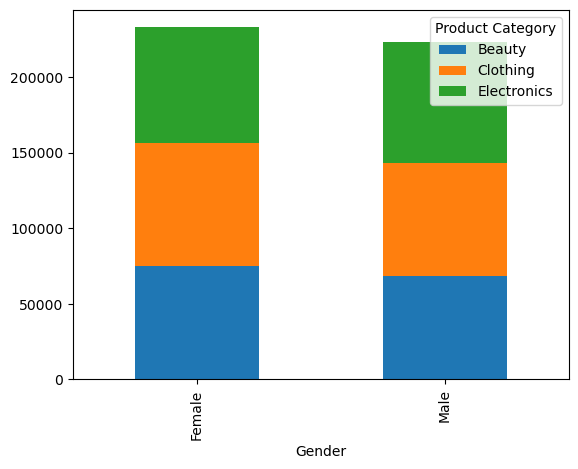

In [158]:
# finding the product category popular to each gender

df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack().plot(kind='bar',stacked=True)
plt.savefig('visuals/product_popular_to_gender.png')

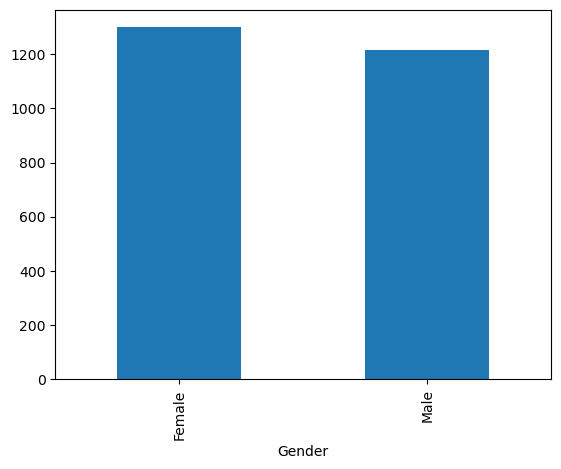

In [156]:
# who buys more items?
df.groupby('Gender')['Quantity'].sum().plot(kind='bar')
plt.savefig('visuals/quantity_purchase_per_gender.png')

### Gender-Based Sales Analysis

After grouping transactions by gender, I uncovered a few key observations:

-Total Revenue: 
Female customers show a slight edge over males in total spending.

-Quantity Purchased: Female customers also bought slightly more items overall, suggesting higher purchasing frequency or cart size.

-Category Engagement: Across product categories, women made slightly more purchases, indicating broader engagement with the store's offerings.

Interpretation:
While the differences aren't drastic, the consistent edge across multiple metrics suggests that female customers may be a slightly more valuable segment for this business.

Business Takeaway:
Marketing strategies and promotions could consider emphasizing segments or product lines that resonate with female buyers to maximize returns, while still maintaining balance to retain male customers.


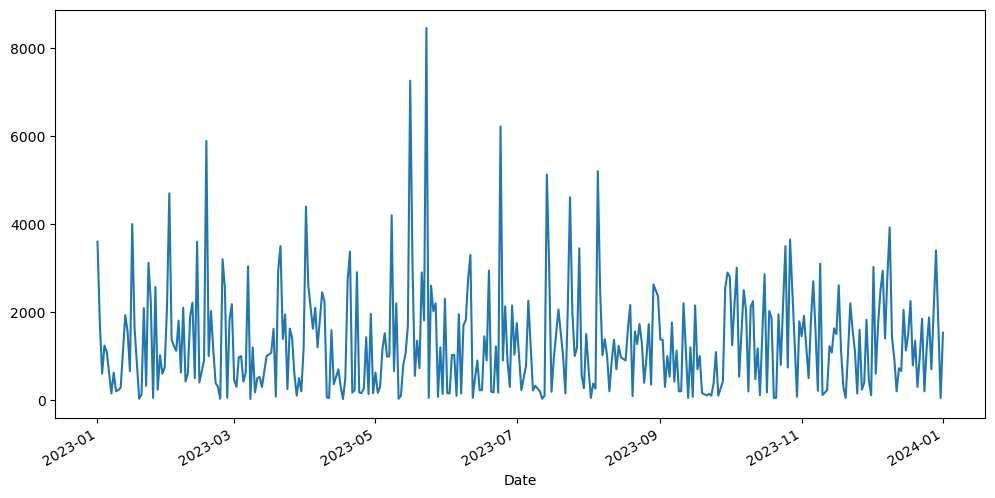

In [154]:
# sales trend over time
df.groupby('Date')['Total Amount'].sum().plot(figsize=(12,6))
plt.savefig('visuals/sales_trend_over_time.png')

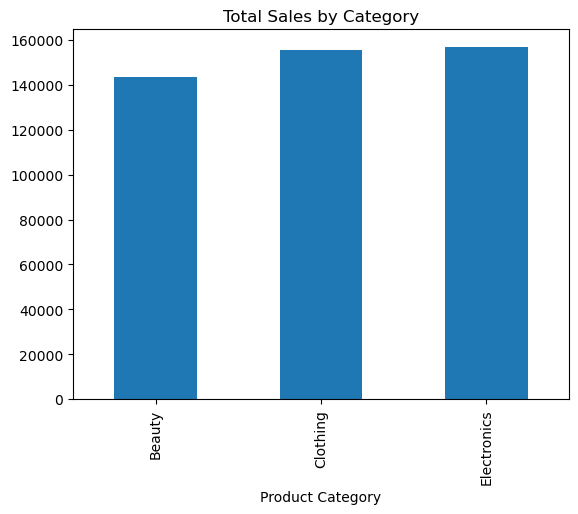

In [152]:
# product category vs total sales
category_sales = df.groupby('Product Category')['Total Amount'].sum()
category_sales.plot(kind='bar', title='Total Sales by Category')
plt.savefig('visuals/product_category vs total_sales.png')

### Sales by Product Category

I grouped transactions by product category and summed the total sales for each.

- Electronics leads as the top-performing category.
- Clothing follows closely behind, with Beauty slightly trailing.
- Despite Electronics taking the lead, the difference in total sales across categories is relatively small.

Insight:
The business appears to have a diversified revenue stream across categories, with no single category overly dominant. This balance can help reduce risk and maintain revenue stability.

Strategy Implication:
Rather than over-investing in one segment, the company may benefit from maintaining or slightly optimizing each category based on trends or margins.


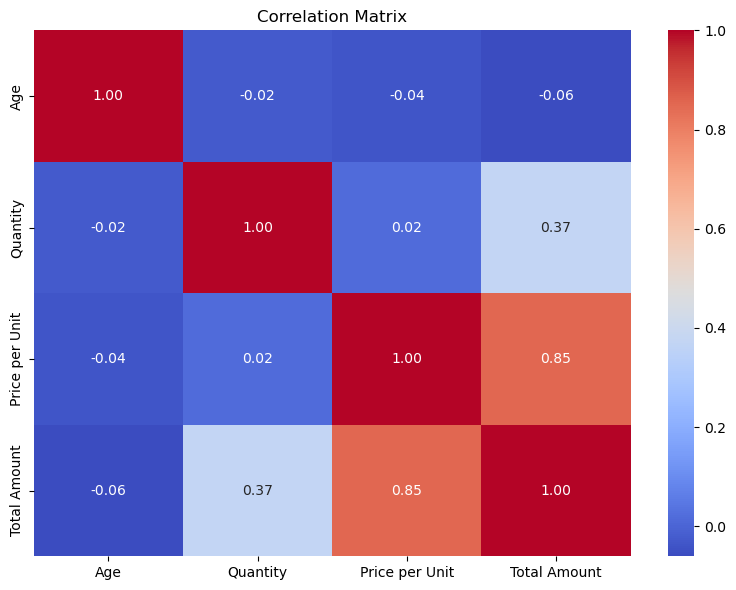

In [150]:
# correlation matrix

# Select numerical columns
num_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('visuals/coreelation_matrix.png')
plt.show()


### Correlation Insights

I analyzed the linear relationships between key numeric variables:

- Price per Unit and Total Amount have a very strong correlation (0.85) — suggesting that high-ticket items significantly drive total revenue.
- Quantity and Total Amount show a moderate correlation (0.37), meaning customers who buy more tend to spend more, but price has a stronger impact than volume.
- Age has no meaningful correlation with any variable — age doesn't appear to influence quantity, price sensitivity, or total spend in this dataset.

 These insights suggest the business’s revenue is more influenced by product pricing strategy than customer demographics or order size.


In [103]:
# finding the top 5 customers
df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)


Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
Name: Total Amount, dtype: int64

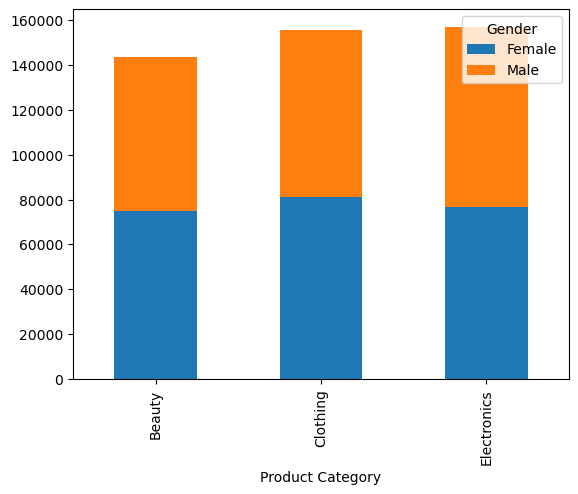

In [148]:
# sales by category for each gender
df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack().plot(kind='bar', stacked=True)
plt.savefig('visuals/gender_sales_by_category.png')

### Product Category Sales by Gender

I visualized total sales by product category, segmented by gender. Each bar was nearly evenly split between male and female customers across all categories:

- No dominant gender emerged in any particular category.
- The chart showed a highly symmetrical distribution, indicating balanced engagement.

 Interpretation:
Gender-based segmentation may not be necessary at the category level — both groups shop similarly across product types.

 Business Implication:
Promotions, product placements, and UI flows can remain gender-neutral, focusing instead on other segmentation factors like purchase behavior, spending range, or time of purchase.


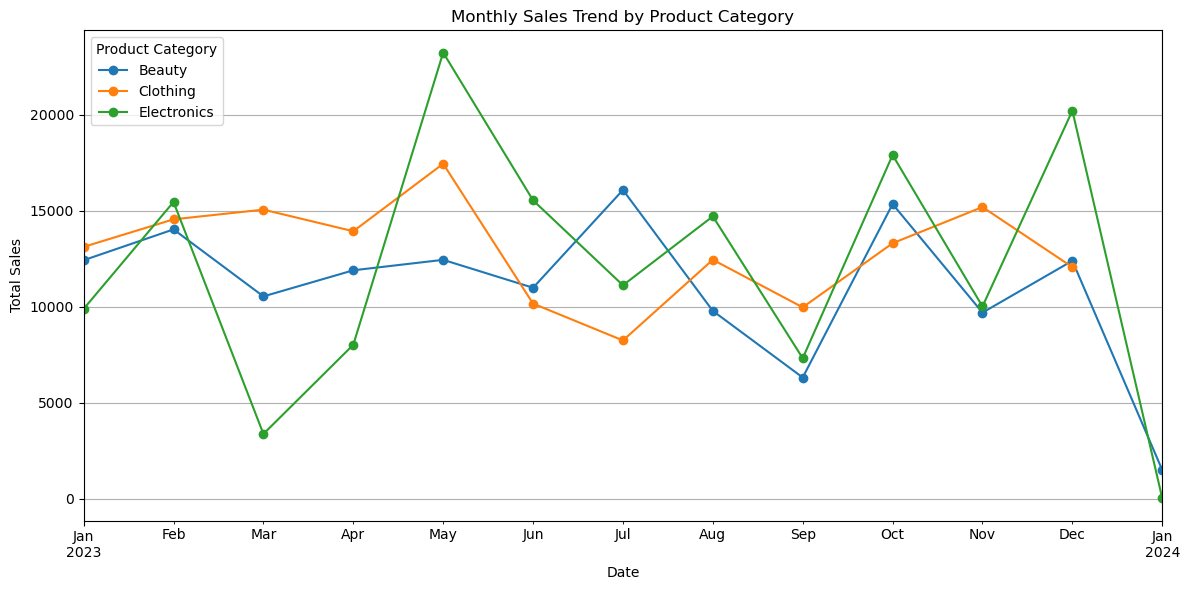

In [144]:
# time trend for each category
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and product category
category_trend = df.groupby([df['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().unstack()

# Plot
category_trend.index = category_trend.index.to_timestamp()
category_trend.plot(figsize=(12,6), marker='o')
plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/monthly_sales_by_category.png')
plt.show()


### Time Series: Sales Trend by Product Category

I analyzed how sales have changed over time across different product categories.

- Electronics consistently leads in peak sales, showing strong and possibly seasonal demand.
- Clothing follows a similar pattern, with steady performance but slightly lower peaks.
- Beauty lags behind, but still maintains a consistent trend.

 Interpretation:
The categories appear to move together, indicating they may all be influenced by shared factors like holidays, promotions, or economic cycles.

 Actionable Insight:
- Electronics shows the strongest time-based sales potential — worthy of deeper pricing or promotion analysis.
- If Clothing and Beauty show smaller peaks but follow the same rhythm, consider bundling or cross-promotions during peak periods to boost revenue.


### Key Insights from the Retail Sales Analysis

1.  Electronics Dominate Sales
   - Electronics is the top-selling product category, followed by Clothing and Beauty.
   - Revenue differences between categories are moderate, suggesting a balanced product portfolio.

2.  Gender Doesn't Drive Product Preference
   - Sales are almost evenly distributed between male and female customers across all categories.
   - No category is significantly skewed toward one gender.

3.  Time-Based Trends Matter
   - Electronics consistently peaks highest in monthly sales trends, especially during certain periods.
   - All categories exhibit similar seasonal patterns, hinting at possible promotional or holiday effects.

4.  Price Has More Impact Than Quantity
   - Strong correlation between `Price per Unit` and `Total Amount` (`0.85`), versus a weaker link between `Quantity` and `Total Amount` (`0.37`).
   - High-ticket items are key revenue drivers.

5.  Age is a Non-Factor
   - Very weak or no correlation between age and purchase behavior.
   - Age does not impact quantity, pricing sensitivity, or total spend in this dataset.

6.  Weekday and Monthly Sales Patterns
   - Sales are fairly consistent across weekdays with minor variations.
   - Monthly analysis reveals steady performance, with spikes potentially tied to specific sales events.

